In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model.logistic import LogisticRegression

%matplotlib inline

### Load Training Data

In [3]:
train_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
pd.set_option('display.max_rows', 15)
display(train_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No


### Analyze and Preprocess

#### null and type check

In [5]:
analysis = pd.DataFrame(columns=['col_name','null_num','type_num'])
for col in train_data:
    row = pd.Series({'col_name':col, 
                     'null_num':train_data[col].isnull().sum(), 
                     'type_num':train_data[col].unique().size})
    analysis = analysis.append(row, ignore_index=True)
    
    
pd.set_option('display.max_rows', 21)
display(analysis)

,col_name,null_num,type_num
0,customerID,0,7043
1,gender,0,2
2,SeniorCitizen,0,2
3,Partner,0,2
4,Dependents,0,2
5,tenure,0,73
6,PhoneService,0,2
7,MultipleLines,0,3
8,InternetService,0,3
9,OnlineSecurity,0,3


#### Drop Error Data   (TotalCharges == " ")

In [6]:
err_rows = pd.to_numeric(train_data['TotalCharges'], errors='coerce').isnull()
err_idx = err_rows.index[err_rows == True]
print("Before:", err_idx, len(err_idx))

train_data = train_data.drop(err_idx)

err_rows = pd.to_numeric(train_data['TotalCharges'], errors='coerce').isnull()
err_idx = err_rows.index[err_rows == True]
print("After:", err_idx, len(err_idx))

display(train_data)

Before: Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64') 11
After: Int64Index([], dtype='int64') 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Y: Churn  (Yes, NO)

In [7]:
# Check Imbalance
cnt_train_data = train_data.groupby('Churn')["Churn"].count()
display(cnt_train_data)
print("train_data ratio:", cnt_train_data[0]/cnt_train_data[1])


train_Y = pd.DataFrame(data=train_data['Churn'].map({"Yes": 1, "No": 0}).astype(int))
print("train_Y shape:", train_Y.shape)

Churn
No     5163
Yes    1869
Name: Churn, dtype: int64

train_data ratio: 2.7624398073836276
train_Y shape: (7032, 1)


#### Categorical

In [8]:
train_X_cat = train_data[['SeniorCitizen']]

# Binary to 0, 1  ->   gender(male, female), Partner, Dependents, PhoneService, PaperlessBilling, Churn)
train_X_cat.insert(0, 'gender', (train_data['gender'].map({"Male": 1, "Female": 0}).astype(int)))     
train_X_cat.insert(2, 'Partner', (train_data['Partner'].map({"Yes": 1, "No": 0}).astype(int)))
train_X_cat.insert(3, 'Dependents', (train_data['Dependents'].map({"Yes": 1, "No": 0}).astype(int)))
train_X_cat.insert(4, 'PhoneService', (train_data['PhoneService'].map({"Yes": 1, "No": 0}).astype(int)))
train_X_cat.insert(5, 'PaperlessBilling', (train_data['PhoneService'].map({"Yes": 1, "No": 0}).astype(int)))


# One-hot encoded
cat_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'] 
print("One-hot encoded features:", cat_features, len(cat_features))

train_X_cat = train_X_cat.join(pd.get_dummies(train_data[cat_features]))


display(train_X_cat)

One-hot encoded features: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'] 10


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,1,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5,0,0,0,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
6,1,0,0,1,1,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
7,0,0,0,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
8,0,0,1,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
9,1,0,0,1,1,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0


#### Numerical

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
5,8,99.65,820.50
6,22,89.10,1949.40
7,10,29.75,301.90
8,28,104.80,3046.05
9,62,56.15,3487.95


,col_name,mean,median,std dev,max,min
0,tenure,32.421786,29.000,24.545260,72,1
1,MonthlyCharges,64.798208,70.350,30.085974,118.75,18.25
2,TotalCharges,2283.300441,1397.475,2266.771362,8684.8,18.8


,tenure,MonthlyCharges,TotalCharges
4610,72,117.80,8684.80
4586,72,118.75,8672.45
6768,72,117.50,8670.10
5347,72,116.95,8594.40
2187,71,116.25,8564.75
6118,72,118.20,8547.15
5558,72,116.40,8543.25
2368,72,117.15,8529.50
2603,72,114.90,8496.70
2025,72,116.85,8477.70


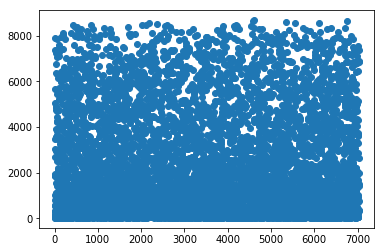

In [9]:
train_X_num = train_data[['tenure', 'MonthlyCharges']]
train_X_num.insert(2, 'TotalCharges', train_data['TotalCharges'].astype(float))
display(train_X_num)

analysis = pd.DataFrame(columns=['col_name','mean', 'median', 'std dev', 'max', 'min'])
for col in train_X_num:
    row = pd.Series({'col_name': col,
                     'mean': train_X_num[col].mean(),
                     'median': train_X_num[col].median(),
                     'std dev': train_X_num[col].std(),
                     'max': train_X_num[col].max(),
                     'min': train_X_num[col].min()})
    analysis = analysis.append(row, ignore_index=True)
display(analysis)



display(train_X_num.sort_values(by='TotalCharges', ascending=False))


plt.scatter(x=range(len(train_X_num)), y=train_X_num['TotalCharges'])

In [10]:
# Concat
train_X = pd.concat([train_X_num, train_X_cat], axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
display(train_X)
print(train_X.columns)

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,1,1,...,1,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,2,70.70,151.65,0,0,0,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
5,8,99.65,820.50,0,0,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
6,22,89.10,1949.40,1,0,0,1,1,1,0,...,1,0,0,1,0,0,0,1,0,0
7,10,29.75,301.90,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
8,28,104.80,3046.05,0,0,1,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
9,62,56.15,3487.95,1,0,0,1,1,1,1,...,1,0,0,0,1,0,1,0,0,0


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit 

### Plot Graphs

Text(0, 0.5, 'Percentage')

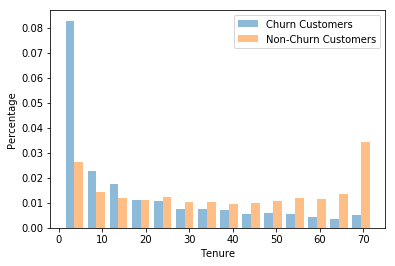

In [11]:
churn = train_data[train_data['Churn'] == 'Yes']
non_churn = train_data[train_data['Churn'] == 'No']

names = ['Churn Customers', 'Non-Churn Customers']
plt.hist([churn['tenure'],non_churn['tenure']], bins=(int(non_churn['tenure'].max()/5)), density=True, alpha=0.5, label=names)
plt.legend(loc='upper right')
plt.xlabel('Tenure')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

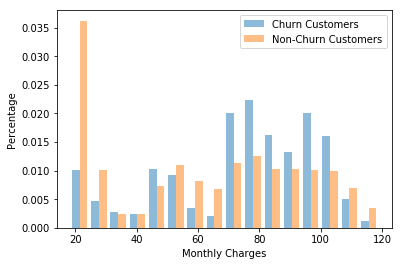

In [26]:
plt.hist([churn['MonthlyCharges'],non_churn['MonthlyCharges']], bins=(int(non_churn['MonthlyCharges'].max()/7)), density=True, alpha=0.5, label=names)
plt.legend(loc='upper right')
plt.xlabel('Monthly Charges')
plt.ylabel('Percentage')


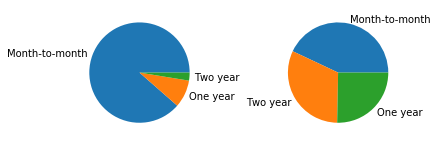

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.pie(churn['Contract'].value_counts().values.tolist(),
        labels=churn['Contract'].value_counts().keys().tolist())

ax2.pie(non_churn['Contract'].value_counts().values.tolist(),
        labels=non_churn['Contract'].value_counts().keys().tolist())

plt.tight_layout()   
plt.show()

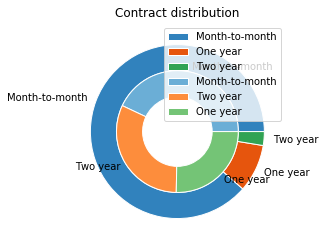

In [59]:
fig, ax = plt.subplots()

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 5, 9]))

ax.pie(churn['Contract'].value_counts().values.tolist(),
       labels=churn['Contract'].value_counts().keys().tolist(),
       radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(non_churn['Contract'].value_counts().values.tolist(),
       labels=non_churn['Contract'].value_counts().keys().tolist(),
       radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Contract distribution')
plt.legend(loc='upper right')

plt.show()

### Hold-out 20% Test

In [27]:
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5625, 40) (1407, 40) (5625, 1) (1407, 1)


In [28]:
cnt_train = y_train.groupby('Churn')['Churn'].count()
cnt_test = y_test.groupby('Churn')['Churn'].count()

print("train ratio:", cnt_train[0]/cnt_train[1])
print("test ratio:", cnt_test[0]/cnt_test[1])

train ratio: 2.762541806020067
test ratio: 2.7620320855614975


### Logistic Regression

In [29]:
clf = LogisticRegression()
theta = clf.fit(x_train, y_train)
scores = clf.score(x_test, y_test)
print(theta)
print("Logistic Regression: R2 Score: %f" % (scores.mean()))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Logistic Regression: R2 Score: 0.786780


/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yuekunwang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


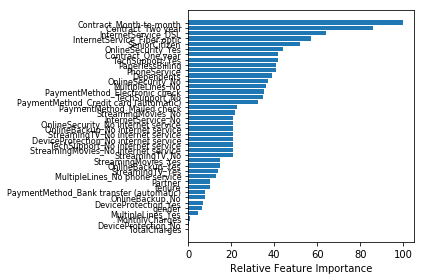

In [39]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(
    np.array(x_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()